In [3]:
from cluster_g_logit_init import *
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

def load_model_essentials(base_path='/Users/sarahurbut/Dropbox (Personal)/filesforupload/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit(
N=Y.shape[0],
D=Y.shape[1],
T=Y.shape[2],
K=essentials['K'],
P=essentials['P'],
G=G,
Y=Y,
prevalence_t=essentials['prevalence_t']
)


Loading components...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_19262/3240220042.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/v

Loaded all components successfully!


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 16 diseases
Cluster 1: 21 diseases
Cluster 2: 15 diseases
Cluster 3: 82 diseases
Cluster 4: 5 diseases
Cluster 5: 7 diseases
Cluster 6: 8 diseases
Cluster 7: 22 diseases
Cluster 8: 28 diseases
Cluster 9: 12 diseases
Cluster 10: 11 diseases
Cluster 11: 8 diseases
Cluster 12: 7 diseases
Cluster 13: 13 diseases
Cluster 14: 10 diseases
Cluster 15: 5 diseases
Cluster 16: 29 diseases
Cluster 17: 17 diseases
Cluster 18: 9 diseases
Cluster 19: 23 diseases
Initialization complete!



Cluster Assignments:

Cluster 0:
  - Rheumatic disease of the heart valves (prevalence: 0.0002)
  - Mitral valve disease (prevalence: 0.0004)
  - Aortic valve disease (prevalence: 0.0002)
  - Disease of tricuspid valve (prevalence: 0.0002)
  - Other forms of chronic heart disease (prevalence: 0.0004)
  - Cardiomegaly (prevalence: 0.0005)
  - Pericarditis (prevalence: 0.0002)
  - Primary/intrinsic cardiomyopathies (prevalence: 0.0001)
  - Left bundle branch block (prevalence: 0.0003)
  - Paroxysmal supraventricular tachycardia (prevalence: 0.0002)
  - Paroxysmal ventricular tachycardia (prevalence: 0.0001)
  - Atrial fibrillation and flutter (prevalence: 0.0010)
  - Congestive heart failure (CHF) NOS (prevalence: 0.0004)
  - Heart failure NOS (prevalence: 0.0007)
  - Pleurisy; pleural effusion (prevalence: 0.0009)
  - Congenital anomalies of great vessels (prevalence: 0.0003)

Cluster 1:
  - Other peripheral nerve disorders (prevalence: 0.0010)
  - Rheumatoid arthritis (prevalence: 0.0

/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:805: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


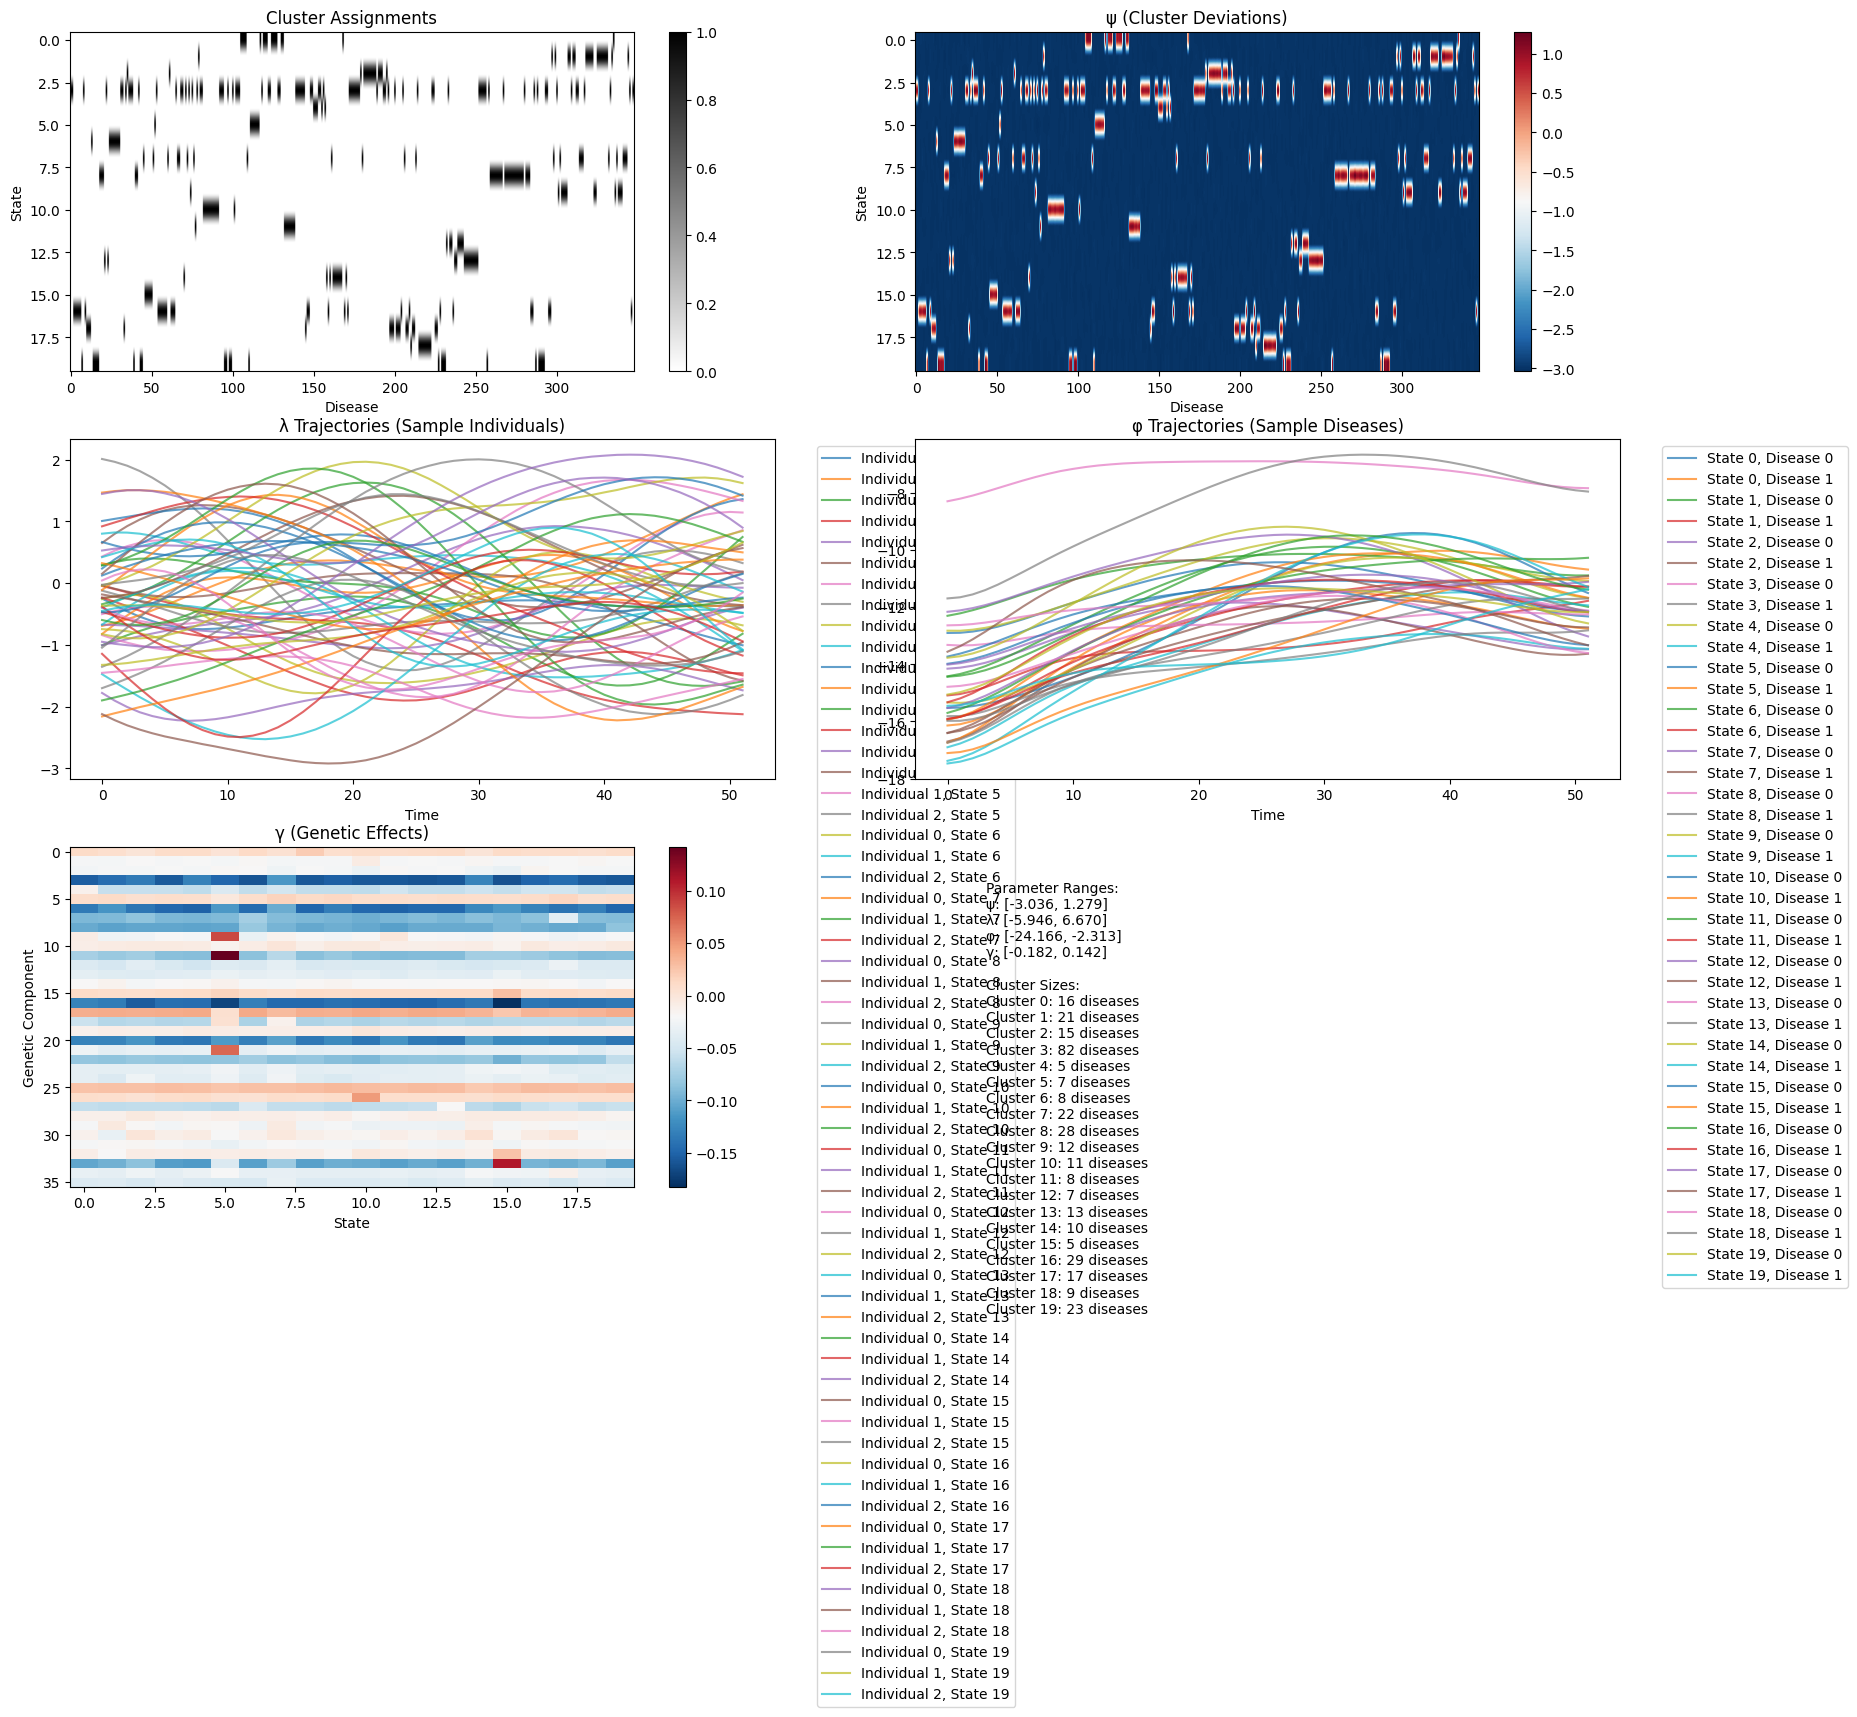

In [7]:
# Visualize the clusters
disease_names=essentials['disease_names']
disease_names_list = disease_names[0].tolist()
model.visualize_clusters(disease_names_list)
model.visualize_initialization()

In [8]:
initial_psi = model.psi.detach().clone()

# Run for just 10 epochs to check behavior
E_tensor = torch.tensor(E, dtype=torch.long)
# don't run below this line, computer will crash

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_12391/2665534965.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  E_tensor = torch.tensor(E, dtype=torch.long)


Starting training...


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:292: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  event_times_tensor = torch.tensor(event_times, dtype=torch.long)


: 

In [ ]:

history = model.fit(E_tensor, num_epochs=1000, learning_rate=1e-4, lambda_reg=1e-2)

# Compare final vs initial psi
print("\nOverall psi changes:")